# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function

#Do I place the name of the key file to call here as follows?
load_dotenv('')


## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets

#Did I do this correctly?
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"



#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response= requests.get(btc_url).json()


# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# is this correct:
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 18996456,
            "id": 1,
            "last_updated": 1648490291,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 901976752936,
                    "percent_change_1h": 0.257475985932766,
                    "percent_change_24h": 6.06941843752609,
                    "percent_change_7d": 15.2344591509047,
                    "percentage_change_1h": 0.257475985932766,
                    "percentage_change_24h": 6.06941843752609,
                    "percentage_change_7d": 15.2344591509047,
                    "price": 47573.0,
                    "volume_24h": 32145711937
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18996456,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencies"

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response= requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# is this correct:
print(json.dumps(eth_response, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 120148431,
            "id": 1027,
            "last_updated": 1648490310,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 404896208019,
                    "percent_change_1h": 0.56371600926448,
                    "percent_change_24h": 6.45013622105477,
                    "percent_change_7d": 18.1640551720707,
                    "percentage_change_1h": 0.56371600926448,
                    "percentage_change_24h": 6.45013622105477,
                    "percentage_change_7d": 18.1640551720707,
                    "price": 3380.25,
                    "volume_24h": 18469921582
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120148431,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencies

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
print(btc_price)


47573.0


In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(eth_price)


3380.25


In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
print(btc_value)


57087.6


In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
print(eth_value)


17915.325


In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f"The total value of the crypto portfolio is {total_crypto_wallet: .2f}")


The total value of the crypto portfolio is  75002.93


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version ='v2'
)


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["AGG", "SPY"]

# Set timeframe to 1D 
timeframe = "1Day"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2022-03-24", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-03-24", tz="America/New_York").isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [16]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
closing_prices = alpaca.get_bars(
    tickers,
    timeframe=timeframe,
    start=start_date,
    end=end_date).df

# Review the first 5 rows of the Alpaca DataFrame
closing_prices


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-03-24 04:00:00+00:00,106.72,107.035,106.65,106.95,7378690,23320,106.879605,AGG
2022-03-24 04:00:00+00:00,445.82,450.500,444.76,450.48,61411569,526865,447.609014,SPY


#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = closing_prices.iloc[0, 3]

# Print the AGG closing price
agg_close_price


106.95

In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = closing_prices.iloc[1, 3]

# Print the SPY closing price
spy_close_price


450.48

#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [19]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
agg_value


21390.0

In [20]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
spy_value


49552.8

In [21]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
total_stocks_bonds


70942.8

In [22]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
round(total_portfolio, 2)


145945.72

### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [23]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
savings_data
    

[75002.925, 70942.8]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [24]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(savings_data, columns = ['amount'], index = ['crypto', 'stock/bond'])

# Display the savings_df DataFrame
savings_df


,amount
crypto,75002.925
stock/bond,70942.800


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Compositon of Personal Savings'}, ylabel='amount'>

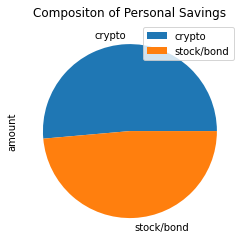

In [25]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y='amount', title='Compositon of Personal Savings')


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [26]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income * 3


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [27]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
# YOUR CODE HERE
if total_portfolio > emergency_fund_value:
    print("Congratulations! You have enough savings.")
elif total_portfolio == emergency_fund_value:
    print("Congratulations on reaching this important milestone")
else: print(f"You're missing ${emergency_fund_value - total_portfolio} to reach your goal.")

Congratulations! You have enough savings.


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [28]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date = pd.Timestamp("2019-03-24", tz = "America/New_York").isoformat()
end_date = pd.Timestamp("2022-03-24", tz = "America/New_York").isoformat()
# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows=1000

In [29]:
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
spy_df = alpaca.get_bars(
    "SPY",
    timeframe,
    start=start_date,
    end=end_date,
    limit=limit_rows
).df

agg_df = alpaca.get_bars(
    "AGG",
    timeframe,
    start=start_date,
    end=end_date,
    limit=limit_rows
).df

portfolio_prices_df = pd.concat([spy_df, agg_df], axis=1, keys=["SPY", "AGG"])

# Display both the first and last five rows of the DataFrame
portfolio_prices_df


SPY                                       \
                             open      high     low   close     volume   
timestamp                                                                
2019-03-25 04:00:00+00:00  278.89  280.1853  277.64  279.04   86084313   
2019-03-26 04:00:00+00:00  280.97  282.1800  279.56  281.12   68192367   
2019-03-27 04:00:00+00:00  281.13  281.7600  277.93  279.65   72224722   
2019-03-28 04:00:00+00:00  280.36  281.2100  279.07  280.71   56284545   
2019-03-29 04:00:00+00:00  282.41  282.8400  281.14  282.48   82240806   
...                           ...       ...     ...     ...        ...   
2022-03-18 04:00:00+00:00  437.81  444.8600  437.22  444.31  102327793   
2022-03-21 04:00:00+00:00  444.45  446.4600  440.68  444.30   85377983   
2022-03-22 04:00:00+00:00  445.99  450.5800  445.86  449.59   73674202   
2022-03-23 04:00:00+00:00  446.90  448.4900  443.71  443.80   77982935   
2022-03-24 04:00:00+00:00  445.82  450.5000  444.76  450.48   61411569   

                                                      AGG                     \
                          trade_count        vwap    open     high       low   
timestamp                                                                      
2019-03-25 04:00:00+00:00      401554  278.894788  108.63  108.989  108.6000   
2019-03-26 04:00:00+00:00      316322  280.736917  108.76  108.930  108.7100   
2019-03-27 04:00:00+00:00      390634  279.780992  109.00  109.180  108.9900   
2019-03-28 04:00:00+00:00      301908  280.322880  109.06  109.140  108.9600   
2019-03-29 04:00:00+00:00      330846  282.129816  108.85  109.070  108.8300   
...                               ...         ...     ...      ...       ...   
2022-03-18 04:00:00+00:00      790235  441.458916  107.93  108.140  107.9203   
2022-03-21 04:00:00+00:00      912432  443.796432  107.58  107.649  106.9841   
2022-03-22 04:00:00+00:00      623610  448.558595  106.74  106.880  106.6100   
2022-03-23 04:00:00+00:00      627281  446.058683  106.96  107.210  106.7105   
2022-03-24 04:00:00+00:00      526865  447.609014  106.72  107.035  106.6500   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2019-03-25 04:00:00+00:00  108.82   4971392       14024  108.811600  
2019-03-26 04:00:00+00:00  108.84   3120549       12914  108.822594  
2019-03-27 04:00:00+00:00  109.07   3719699       11931  109.073313  
2019-03-28 04:00:00+00:00  109.08   6070991       10731  109.072146  
2019-03-29 04:00:00+00:00  109.07   5989397       20842  109.021800  
...                           ...       ...         ...         ...  
2022-03-18 04:00:00+00:00  108.10   7800354       23567  108.060585  
2022-03-21 04:00:00+00:00  107.04   7583668       27316  107.310151  
2022-03-22 04:00:00+00:00  106.75  16048681       51796  106.746967  
2022-03-23 04:00:00+00:00  107.19   8567200       27348  106.991875  
2022-03-24 04:00:00+00:00  106.95   7378690       23320  106.879605  

[758 rows x 14 columns]

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [30]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_thirty_year = MCSimulation(
    portfolio_data= portfolio_prices_df,
    weights=[0.60, 0.40],
    num_simulation = 100,
    num_trading_days = 252 * 30
)
# Review the simulation input data
MC_thirty_year.portfolio_data.head()


SPY                                      \
                             open      high     low   close    volume   
timestamp                                                               
2019-03-25 04:00:00+00:00  278.89  280.1853  277.64  279.04  86084313   
2019-03-26 04:00:00+00:00  280.97  282.1800  279.56  281.12  68192367   
2019-03-27 04:00:00+00:00  281.13  281.7600  277.93  279.65  72224722   
2019-03-28 04:00:00+00:00  280.36  281.2100  279.07  280.71  56284545   
2019-03-29 04:00:00+00:00  282.41  282.8400  281.14  282.48  82240806   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-03-25 04:00:00+00:00      401554  278.894788          NaN  108.63   
2019-03-26 04:00:00+00:00      316322  280.736917     0.007454  108.76   
2019-03-27 04:00:00+00:00      390634  279.780992    -0.005229  109.00   
2019-03-28 04:00:00+00:00      301908  280.322880     0.003790  109.06   
2019-03-29 04:00:00+00:00      330846  282.129816     0.006305  108.85   

                                                                         \
                              high     low   close   volume trade_count   
timestamp                                                                 
2019-03-25 04:00:00+00:00  108.989  108.60  108.82  4971392       14024   
2019-03-26 04:00:00+00:00  108.930  108.71  108.84  3120549       12914   
2019-03-27 04:00:00+00:00  109.180  108.99  109.07  3719699       11931   
2019-03-28 04:00:00+00:00  109.140  108.96  109.08  6070991       10731   
2019-03-29 04:00:00+00:00  109.070  108.83  109.07  5989397       20842   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-03-25 04:00:00+00:00  108.811600          NaN  
2019-03-26 04:00:00+00:00  108.822594     0.000184  
2019-03-27 04:00:00+00:00  109.073313     0.002113  
2019-03-28 04:00:00+00:00  109.072146     0.000092  
2019-03-29 04:00:00+00:00  109.021800    -0.000092

In [31]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997001,1.011847,0.993951,1.012176,0.997408,0.995396,0.994770,1.009081,1.008262,1.018812,...,0.994766,0.987437,1.011855,0.994383,1.007827,1.005374,1.004240,1.018310,1.003457,0.986276
2,0.996021,1.005222,0.998432,1.003112,1.000915,1.000586,0.991940,1.013795,1.016713,1.001113,...,1.005748,0.982050,1.004503,0.990731,1.017502,1.005280,1.016515,1.025233,0.994442,0.989326
3,0.993630,1.006134,0.993220,1.005230,0.996139,1.001851,0.989899,1.001195,1.011157,1.009402,...,1.000367,0.983003,1.000898,0.984375,1.005200,1.006607,1.033295,1.031170,0.992898,0.971815
4,0.981578,1.003831,1.013499,0.992212,0.994050,0.998801,1.012750,1.007555,1.016960,1.011022,...,1.016389,0.989860,1.002600,0.986194,0.999128,0.994383,1.041435,1.035799,0.994423,0.968371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,24.001897,58.277444,38.705372,8.058442,16.591287,8.027894,16.668613,17.981487,79.220599,27.329062,...,33.011662,2.985698,53.382343,53.568049,15.542883,24.499976,63.607702,27.714162,27.732872,22.112204
7557,24.233637,58.939708,38.468524,8.028612,16.713871,8.021644,16.347139,18.037001,79.913852,27.582470,...,33.354310,3.008572,53.275014,54.944762,15.414779,24.793600,64.050146,27.693921,27.906612,22.287780
7558,24.082657,58.551579,38.285048,8.001821,16.510975,7.976099,16.336109,17.661520,80.798705,27.638684,...,33.030218,2.979298,54.201463,54.758171,15.468800,24.956016,63.607322,27.710440,27.725261,21.985911
7559,24.159141,58.507729,37.902827,8.082951,16.588590,7.973139,15.923933,18.132623,81.452317,27.655346,...,33.034328,2.976156,55.100875,54.471475,15.458642,25.074555,64.524512,27.850952,27.815918,21.976159


<AxesSubplot:title={'center':'100 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

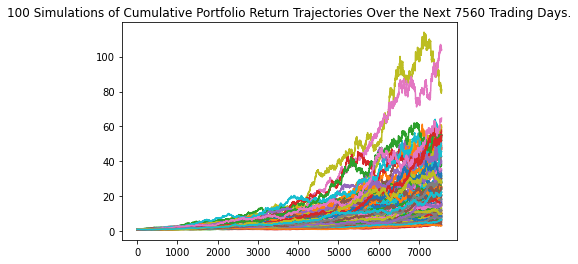

In [32]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_thirty_year.plot_simulation()

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 100 Simulations'}, ylabel='Frequency'>

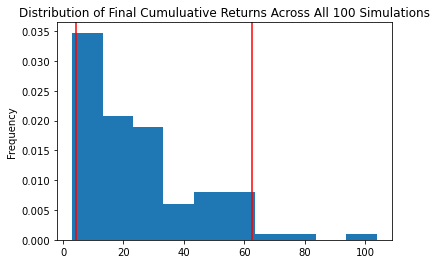

In [33]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_thirty_year.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [34]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_thirty_summary = MC_thirty_year.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
MC_thirty_summary

C:\Users\jenni\OneDrive\Desktop\FinTech-Workspace\ModulesorWeeklyChallenges\Challenge Module 5\Starter_Code-1\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           100.000000
mean             25.249127
std              19.120092
min               3.012674
25%              10.138513
50%              19.409953
75%              33.010003
max             103.776777
95% CI Lower      4.286257
95% CI Upper     62.417959
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [35]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current value of the stocks/bonds portfolio is {total_stocks_bonds}")


The current value of the stocks/bonds portfolio is 70942.8


In [38]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = MC_thirty_summary[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return = MC_thirty_summary[9]* total_stocks_bonds

# Print the result of your calculations
print(f"Given the current value of our stock portfolio, the cumulative returns over the next 30 years is forecast to be between ${ci_lower_thirty_cumulative_return: .2f} and ${ci_upper_thirty_cumulative_return: .2f}")


Given the current value of our stock portfolio, the cumulative returns over the next 30 years is forecast to be between $ 304079.09 and $ 4428104.76


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [39]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_ten_year = MCSimulation(
    portfolio_data= portfolio_prices_df,
    weights=[0.80, 0.20],
    num_simulation = 100,
    num_trading_days = 252 * 10
)

# Review the simulation input data
# verify?
MC_ten_year.portfolio_data.head()


SPY                                         \
                             open      high       low   close     volume   
timestamp                                                                  
2015-12-01 05:00:00+00:00  209.42  210.8200  209.1100  210.68   97858418   
2015-12-02 05:00:00+00:00  210.60  211.0000  208.2300  208.54  108069059   
2015-12-03 05:00:00+00:00  208.90  209.1500  204.7511  205.58  166224154   
2015-12-04 05:00:00+00:00  206.10  209.9700  205.9300  209.66  192878747   
2015-12-07 05:00:00+00:00  209.20  209.7295  207.2000  208.27  102027111   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2015-12-01 05:00:00+00:00      337780  209.921410          NaN  108.54   
2015-12-02 05:00:00+00:00      367013  209.563055    -0.010158  108.73   
2015-12-03 05:00:00+00:00      546768  206.878936    -0.014194  108.41   
2015-12-04 05:00:00+00:00      556731  208.178631     0.019846  108.05   
2015-12-07 05:00:00+00:00      374705  208.276128    -0.006630  108.30   

                                                                          \
                               high     low   close   volume trade_count   
timestamp                                                                  
2015-12-01 05:00:00+00:00  108.8400  108.43  108.82  4259986       15562   
2015-12-02 05:00:00+00:00  108.7799  108.61  108.67  2462787       11581   
2015-12-03 05:00:00+00:00  108.4100  107.81  107.89  4634020       16801   
2015-12-04 05:00:00+00:00  108.3000  108.00  108.24  2182057        9796   
2015-12-07 05:00:00+00:00  108.5800  108.23  108.40  2143773        9104   

                                                    
                                 vwap daily_return  
timestamp                                           
2015-12-01 05:00:00+00:00  108.754152          NaN  
2015-12-02 05:00:00+00:00  108.684692    -0.001378  
2015-12-03 05:00:00+00:00  108.040315    -0.007178  
2015-12-04 05:00:00+00:00  108.192232     0.003244  
2015-12-07 05:00:00+00:00  108.460067     0.001478

In [40]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
# verify?
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003870,1.010332,0.995522,0.983349,0.986467,1.003981,1.005124,1.002179,1.001649,0.988574,...,0.989006,1.013899,1.004240,0.995051,1.002591,0.990884,0.996646,0.995982,0.993508,1.001233
2,1.006444,1.012047,0.996378,0.978479,0.980327,0.997407,1.001841,1.001648,0.997697,0.989457,...,0.986935,1.016836,0.997368,1.000201,0.998941,0.992448,0.991583,0.993138,0.989372,1.008774
3,1.008489,1.013752,0.999697,0.974582,0.984367,0.995698,1.000251,1.007202,0.997455,1.001590,...,0.989593,1.011415,0.998760,1.002192,0.997574,0.992751,1.003213,0.997690,0.995038,1.009636
4,1.001678,1.023854,1.003099,0.972543,0.968952,0.992714,1.007729,1.006155,0.991355,1.001136,...,0.974101,1.023501,0.989238,1.009733,0.999543,0.994281,0.995387,1.005555,0.994065,1.010455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.385313,2.928724,2.547596,2.822133,2.291635,1.737297,2.359470,1.917813,2.980246,1.645422,...,3.224075,4.711805,1.438691,2.690910,2.345541,1.285301,3.622068,2.642379,3.228213,2.521063
2517,3.384177,2.951401,2.525499,2.821084,2.293061,1.722513,2.318128,1.893721,2.962976,1.638955,...,3.204273,4.698612,1.431391,2.700418,2.321023,1.278291,3.621376,2.620678,3.251044,2.535811
2518,3.400135,2.954186,2.539394,2.819256,2.275103,1.720944,2.308260,1.891340,2.962213,1.659707,...,3.202330,4.708898,1.411153,2.738004,2.317140,1.275234,3.664476,2.604959,3.287863,2.542950
2519,3.387517,2.910770,2.557669,2.827540,2.269576,1.733497,2.316285,1.891083,2.958466,1.662735,...,3.188329,4.732788,1.419832,2.740446,2.304981,1.289776,3.658225,2.615735,3.277089,2.543323


<AxesSubplot:title={'center':'100 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

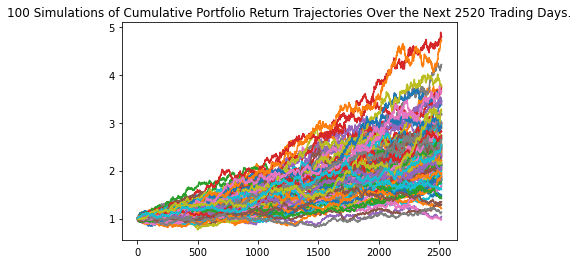

In [41]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_ten_year.plot_simulation()


<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 100 Simulations'}, ylabel='Frequency'>

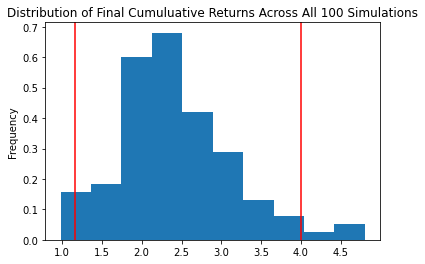

In [42]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_ten_year.plot_distribution()


In [43]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_ten_year_summary = MC_ten_year.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
MC_ten_year_summary

C:\Users\jenni\OneDrive\Desktop\FinTech-Workspace\ModulesorWeeklyChallenges\Challenge Module 5\Starter_Code-1\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           100.000000
mean              2.425891
std               0.713354
min               0.980950
25%               1.946224
50%               2.381969
75%               2.758963
max               4.801617
95% CI Lower      1.168447
95% CI Upper      3.999574
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [44]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current value of the stocks/bonds portfolio is {total_stocks_bonds}")


The current value of the stocks/bonds portfolio is 70942.8


In [46]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = MC_ten_year_summary[8] * total_stocks_bonds
ci_upper_ten_cumulative_return = MC_ten_year_summary[9] * total_stocks_bonds

# Print the result of your calculations
print(f"Given the current value of our stock portfolio, the cumulative returns over the next 10 years is forecast to be between ${ci_lower_ten_cumulative_return: .2f} and ${ci_upper_ten_cumulative_return: .2f}")



Given the current value of our stock portfolio, the cumulative returns over the next 10 years is forecast to be between $ 82892.93 and $ 283740.98


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?